# Exploratory Data Analysis

## Import modules

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
POLICY_DATA = '../data/datastorm_policy_data.csv'
AGENT_DATA = '../data/datastorm_agent_data.csv'

## Policy data

In [3]:
df = pd.read_csv(POLICY_DATA, parse_dates=['commencement_dt', 'next_due_dt', 'termination_dt', 'main_holder_dob', 'spouse_dob', 'child1_dob', 'child2_dob', 'child3_dob', 'child4_dob', 'child5_dob', 'policy_snapshot_as_on', 'run_date' ], low_memory=False)

In [4]:
print(df.shape)

(631422, 57)


In [5]:
df.drop_duplicates().shape

(631422, 57)

In [6]:
df.columns

Index(['main_holder_occupation_cd', 'policy_term', 'policy_payment_mode',
       'policy_status', 'commencement_dt', 'next_due_dt', 'termination_dt',
       'termination_reason', 'main_holder_gender', 'main_holder_dob',
       'main_holder_entry_age', 'main_holder_smoker_flag', 'spouse_gender',
       'spouse_dob', 'spouse_entry_age', 'spouse_smoker_flag',
       'total_sum_assuared', 'premium_value', 'rider1_prem',
       'rider1_sum_assuared', 'rider2_prem', 'rider2_sum_assuared',
       'rider3_prem', 'rider3_sum_assuared', 'rider4_prem',
       'rider4_sum_assuared', 'rider5_prem', 'rider5_sum_assuared',
       'rider6_prem', 'rider6_sum_assuared', 'rider7_prem',
       'rider7_sum_assuared', 'rider8_prem', 'rider8_sum_assuared',
       'rider9_prem', 'rider9_sum_assuared', 'rider10_prem',
       'rider10_sum_assuared', 'child1_dob', 'child1_gender', 'child2_dob',
       'child2_gender', 'child3_dob', 'child3_gender', 'child4_dob',
       'child4_gender', 'child5_dob', 'child5_gend

### Customer specific features 

In [7]:
customer_specific_features = ['main_holder_occupation_cd','main_holder_gender', 'main_holder_dob',
                              'main_holder_smoker_flag', 'spouse_gender',
                              'spouse_dob', 'spouse_smoker_flag',
                              'child1_dob', 'child1_gender', 'child2_dob',
                              'child2_gender', 'child3_dob', 'child3_gender', 'child4_dob',
                              'child4_gender', 'child5_dob', 'child5_gender',
                              'main_holder_occupation', 
                              'client_code']

In [8]:
df[df.policy_snapshot_as_on=='2018-12-31'][customer_specific_features].drop_duplicates().client_code.value_counts()

C104475    4
C102806    4
C109490    4
C100657    4
C103063    4
          ..
C105140    1
C108612    1
C100655    1
C108199    1
C120984    1
Name: client_code, Length: 22262, dtype: int64

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df[(df.policy_snapshot_as_on=='2018-12-31') & (df.client_code=='C103063')])

,main_holder_occupation_cd,policy_term,policy_payment_mode,policy_status,commencement_dt,next_due_dt,termination_dt,termination_reason,main_holder_gender,main_holder_dob,main_holder_entry_age,main_holder_smoker_flag,spouse_gender,spouse_dob,spouse_entry_age,spouse_smoker_flag,total_sum_assuared,premium_value,rider1_prem,rider1_sum_assuared,rider2_prem,rider2_sum_assuared,rider3_prem,rider3_sum_assuared,rider4_prem,rider4_sum_assuared,rider5_prem,rider5_sum_assuared,rider6_prem,rider6_sum_assuared,rider7_prem,rider7_sum_assuared,rider8_prem,rider8_sum_assuared,rider9_prem,rider9_sum_assuared,rider10_prem,rider10_sum_assuared,child1_dob,child1_gender,child2_dob,child2_gender,child3_dob,child3_gender,child4_dob,child4_gender,child5_dob,child5_gender,payment_method,main_holder_occupation,policy_snapshot_as_on,run_date,client_code,agent_code,product_code,product_name,policy_code
217262,207.0,30,M,INFORCE,2011-03-14,2018-12-14,NaT,NaN,M,1980-01-01,31,N,F,1979-10-01,36.0,N,500000.0,11868.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,4440.0,400000,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,NaN,2018-12-31,2020-07-01,C103063,AG107924,RE001,RETIREMENT,POL31862
225219,207.0,28,M,INFORCE,2006-11-21,2006-12-21,NaT,NaN,M,1980-01-01,27,N,NaN,NaT,NaN,NaN,36000.0,60000.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,NaN,2018-12-31,2020-07-01,C103063,AG107924,RE001,RETIREMENT,POL9741
305542,207.0,16,H,LAPSED,2004-03-21,2011-09-21,NaT,OTHERS,M,1980-01-01,24,N,NaN,NaT,NaN,NaN,220000.0,16168.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,NaN,2018-12-31,2020-07-01,C103063,AG107924,ED001,EDUCATION,POL11687
330290,207.0,30,H,INFORCE,2006-05-21,2019-05-21,NaT,NaN,M,1980-01-01,26,N,NaN,NaT,NaN,NaN,650000.0,32688.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,4850.0,650000,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,NaN,2018-12-31,2020-07-01,C103063,AG107924,HE001,HEALTH,POL28253
467699,207.0,20,M,LAPSED,2009-09-21,2013-09-21,NaT,OTHERS,M,1980-01-01,30,N,F,1979-10-01,30.0,N,1000000.0,54084.0,0,0,1752.0,1000000,0.0,0,0,0,0,0,0,0,0.0,0,1956.0,300000,0,0,0,0,2004-01-01,F,2007-06-01,F,NaT,NaN,NaT,NaN,NaT,NaN,CASH,NaN,2018-12-31,2020-07-01,C103063,AG107924,HE001,HEALTH,POL19451
469741,207.0,20,M,LAPSED,2013-12-28,2014-09-28,NaT,OTHERS,M,1980-01-01,34,N,NaN,NaT,NaN,NaN,620000.0,33564.0,0,0,0.0,0,0.0,0,312,50000,0,0,0,0,0.0,0,0.0,0,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,NaN,2018-12-31,2020-07-01,C103063,AG103705,HE001,HEALTH,POL18466
532749,207.0,20,Y,INFORCE,2009-05-21,2019-05-21,NaT,NaN,M,1980-01-01,29,N,NaN,NaT,NaN,NaN,265000.0,13300.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,NaN,2018-12-31,2020-07-01,C103063,AG107924,HE001,HEALTH,POL7290
556754,207.0,25,H,INFORCE,2015-10-28,2019-04-28,NaT,NaN,M,1980-01-01,36,N,NaN,NaT,NaN,NaN,1000000.0,54802.0,0,0,3500.0,2000000,0.0,0,0,0,0,0,0,0,0.0,0,17880.0,950000,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,NaN,2018-12-31,2020-07-01,C103063,AG107924,HE001,HEALTH,POL23397
586677,207.0,20,M,INFORCE,2013-09-21,2018-12-21,NaT,NaN,M,1980-01-01,34,N,F,1979-10-01,34.0,N,1000000.0,63624.0,0,0,3504.0,2000000,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,2004-01-01,F,2007-06-01,F,2012-12-01,M,NaT,NaN,NaT,NaN,CASH,NaN,2018-12-31,2020-07-01,C103063,AG107924,HE001,HEALTH,POL16944


In [10]:
other_features = ['policy_snapshot_as_on', 'run_date']

### Policy Specific Features

In [11]:
other_features = ['policy_snapshot_as_on', 'run_date']

In [12]:
policy_specific_features = [feat for feat in df.columns if feat not in customer_specific_features+other_features]

In [13]:
df[policy_specific_features]

,policy_term,policy_payment_mode,policy_status,commencement_dt,next_due_dt,termination_dt,termination_reason,main_holder_entry_age,spouse_entry_age,total_sum_assuared,...,rider8_sum_assuared,rider9_prem,rider9_sum_assuared,rider10_prem,rider10_sum_assuared,payment_method,agent_code,product_code,product_name,policy_code
0,20,M,INFORCE,2011-08-21,2019-02-21,NaT,NaN,28,22.0,310000.0,...,50000,0,0,0,0,CASH,AG108847,HE001,HEALTH,POL28535
1,15,M,INFORCE,2006-07-14,2019-09-14,NaT,NaN,48,NaN,1000000.0,...,0,0,0,0,0,CASH,AG103677,RE001,RETIREMENT,POL27771
2,20,Y,INFORCE,2018-12-28,2019-12-28,NaT,NaN,51,NaN,500000.0,...,0,0,0,0,0,CASH,AG103249,IN001,INVESTMENT,POL29786
3,15,Q,INFORCE,2018-11-06,2020-02-06,NaT,NaN,29,NaN,250000.0,...,0,8920,200000,0,0,CHEQUE,AG106733,HE001,HEALTH,POL24635
4,15,M,LAPSED,2012-04-28,2015-06-28,NaT,OTHERS,24,NaN,205000.0,...,100000,0,0,0,0,CASH,AG106907,HE001,HEALTH,POL7470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631417,15,M,INFORCE,2012-08-21,2020-05-21,NaT,NaN,31,25.0,55555.0,...,0,0,0,0,0,CASH,AG101538,HE001,HEALTH,POL14777
631418,18,M,LAPSED,2016-01-21,2020-01-21,NaT,NaN,33,NaN,300000.0,...,0,0,0,0,0,CASH,AG107717,IN001,INVESTMENT,POL7988
631419,15,M,INFORCE,2008-05-21,2020-06-21,NaT,NaN,50,NaN,265000.0,...,0,0,0,0,0,CASH,AG100394,HE001,HEALTH,POL0263
631420,20,M,INFORCE,2019-08-16,2020-06-16,NaT,NaN,27,NaN,275000.0,...,0,0,0,0,0,CHEQUE,AG107517,IN001,INVESTMENT,POL17804


### Two or more spouses

In [14]:
df.policy_code.value_counts()

POL6967     27
POL17737    22
POL5918     20
POL35367    20
POL4967     20
            ..
POL27966     1
POL20086     1
POL12569     1
POL12181     1
POL12643     1
Name: policy_code, Length: 36562, dtype: int64

In [15]:
df.policy_snapshot_as_on.nunique()

20

In [16]:
df[df.policy_code=='POL6967'].sort_values('policy_snapshot_as_on').shape

(27, 57)

In [17]:
df[df.policy_code=='POL6967'].sort_values('policy_snapshot_as_on').drop_duplicates().shape

(27, 57)

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[(df.policy_code=='POL6967') & (df.policy_snapshot_as_on=='2020-02-01') ].sort_values('policy_snapshot_as_on'))

,main_holder_occupation_cd,policy_term,policy_payment_mode,policy_status,commencement_dt,next_due_dt,termination_dt,termination_reason,main_holder_gender,main_holder_dob,main_holder_entry_age,main_holder_smoker_flag,spouse_gender,spouse_dob,spouse_entry_age,spouse_smoker_flag,total_sum_assuared,premium_value,rider1_prem,rider1_sum_assuared,rider2_prem,rider2_sum_assuared,rider3_prem,rider3_sum_assuared,rider4_prem,rider4_sum_assuared,rider5_prem,rider5_sum_assuared,rider6_prem,rider6_sum_assuared,rider7_prem,rider7_sum_assuared,rider8_prem,rider8_sum_assuared,rider9_prem,rider9_sum_assuared,rider10_prem,rider10_sum_assuared,child1_dob,child1_gender,child2_dob,child2_gender,child3_dob,child3_gender,child4_dob,child4_gender,child5_dob,child5_gender,payment_method,main_holder_occupation,policy_snapshot_as_on,run_date,client_code,agent_code,product_code,product_name,policy_code
98986,348.0,20,M,INFORCE,2010-12-07,2020-02-07,NaT,NaN,M,1977-02-01,34,Y,F,1981-10-01,37.0,N,320000.0,18012.0,0,0,840.0,320000,0.0,0,0,0,0,0,0,0,0.0,0,792.0,50000,0,0,0,0,2004-04-01,F,2009-01-01,F,2009-01-01,F,2013-05-01,M,NaT,NaN,CASH,CHARGE CRANEMEN,2020-02-01,2020-07-01,C107409,AG106304,HE001,HEALTH,POL6967
547076,348.0,20,M,INFORCE,2010-12-07,2020-02-07,NaT,NaN,M,1977-02-01,34,Y,F,1975-05-01,38.0,N,320000.0,18012.0,0,0,840.0,320000,0.0,0,0,0,0,0,0,0,0.0,0,792.0,50000,0,0,0,0,2004-04-01,F,2009-01-01,F,2009-01-01,F,2013-05-01,M,NaT,NaN,CASH,CHARGE CRANEMEN,2020-02-01,2020-07-01,C107409,AG106304,HE001,HEALTH,POL6967


In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[df.policy_code=='POL6967'].sort_values('policy_snapshot_as_on'))

,main_holder_occupation_cd,policy_term,policy_payment_mode,policy_status,commencement_dt,next_due_dt,termination_dt,termination_reason,main_holder_gender,main_holder_dob,main_holder_entry_age,main_holder_smoker_flag,spouse_gender,spouse_dob,spouse_entry_age,spouse_smoker_flag,total_sum_assuared,premium_value,rider1_prem,rider1_sum_assuared,rider2_prem,rider2_sum_assuared,rider3_prem,rider3_sum_assuared,rider4_prem,rider4_sum_assuared,rider5_prem,rider5_sum_assuared,rider6_prem,rider6_sum_assuared,rider7_prem,rider7_sum_assuared,rider8_prem,rider8_sum_assuared,rider9_prem,rider9_sum_assuared,rider10_prem,rider10_sum_assuared,child1_dob,child1_gender,child2_dob,child2_gender,child3_dob,child3_gender,child4_dob,child4_gender,child5_dob,child5_gender,payment_method,main_holder_occupation,policy_snapshot_as_on,run_date,client_code,agent_code,product_code,product_name,policy_code
288683,348.0,20,M,INFORCE,2010-12-07,2019-01-07,NaT,NaN,M,1977-02-01,34,Y,F,1975-05-01,38.0,N,320000.0,18012.0,0,0,840.0,320000,0.0,0,0,0,0,0,0,0,0.0,0,792.0,50000,0,0,0,0,2004-04-01,F,2009-01-01,F,2009-01-01,F,2013-05-01,M,NaT,NaN,CASH,CHARGE CRANEMEN,2018-12-31,2020-07-01,C107409,AG106304,HE001,HEALTH,POL6967
625209,348.0,20,M,INFORCE,2010-12-07,2019-02-07,NaT,NaN,M,1977-02-01,34,Y,F,1975-05-01,38.0,N,320000.0,18012.0,0,0,840.0,320000,0.0,0,0,0,0,0,0,0,0.0,0,792.0,50000,0,0,0,0,2004-04-01,F,2009-01-01,F,2009-01-01,F,2013-05-01,M,NaT,NaN,CASH,CHARGE CRANEMEN,2019-01-31,2020-07-01,C107409,AG106304,HE001,HEALTH,POL6967
80553,348.0,20,M,INFORCE,2010-12-07,2019-03-07,NaT,NaN,M,1977-02-01,34,Y,F,1975-05-01,38.0,N,320000.0,18012.0,0,0,840.0,320000,0.0,0,0,0,0,0,0,0,0.0,0,792.0,50000,0,0,0,0,2004-04-01,F,2009-01-01,F,2009-01-01,F,2013-05-01,M,NaT,NaN,CASH,CHARGE CRANEMEN,2019-02-28,2020-07-01,C107409,AG106304,HE001,HEALTH,POL6967
549640,348.0,20,M,INFORCE,2010-12-07,2019-04-07,NaT,NaN,M,1977-02-01,34,Y,F,1975-05-01,38.0,N,320000.0,18012.0,0,0,840.0,320000,0.0,0,0,0,0,0,0,0,0.0,0,792.0,50000,0,0,0,0,2004-04-01,F,2009-01-01,F,2009-01-01,F,2013-05-01,M,NaT,NaN,CASH,CHARGE CRANEMEN,2019-03-31,2020-07-01,C107409,AG106304,HE001,HEALTH,POL6967
160499,348.0,20,M,INFORCE,2010-12-07,2019-04-07,NaT,NaN,M,1977-02-01,34,Y,F,1975-05-01,38.0,N,320000.0,18012.0,0,0,840.0,320000,0.0,0,0,0,0,0,0,0,0.0,0,792.0,50000,0,0,0,0,2004-04-01,F,2009-01-01,F,2009-01-01,F,2013-05-01,M,NaT,NaN,CASH,CHARGE CRANEMEN,2019-04-30,2020-07-01,C107409,AG106304,HE001,HEALTH,POL6967
204263,348.0,20,M,INFORCE,2010-12-07,2019-05-07,NaT,NaN,M,1977-02-01,34,Y,F,1975-05-01,38.0,N,320000.0,18012.0,0,0,840.0,320000,0.0,0,0,0,0,0,0,0,0.0,0,792.0,50000,0,0,0,0,2004-04-01,F,2009-01-01,F,2009-01-01,F,2013-05-01,M,NaT,NaN,CASH,CHARGE CRANEMEN,2019-05-31,2020-07-01,C107409,AG106304,HE001,HEALTH,POL6967
581167,348.0,20,M,INFORCE,2010-12-07,2019-07-07,NaT,NaN,M,1977-02-01,34,Y,F,1975-05-01,38.0,N,320000.0,18012.0,0,0,840.0,320000,0.0,0,0,0,0,0,0,0,0.0,0,792.0,50000,0,0,0,0,2004-04-01,F,2009-01-01,F,2009-01-01,F,2013-05-01,M,NaT,NaN,CASH,CHARGE CRANEMEN,2019-06-30,2020-07-01,C107409,AG106304,HE001,HEALTH,POL6967
357350,348.0,20,M,INFORCE,2010-12-07,2019-08-07,NaT,NaN,M,1977-02-01,34,Y,F,1975-05-01,38.0,N,320000.0,18012.0,0,0,840.0,320000,0.0,0,0,0,0,0,0,0,0.0,0,792.0,50000,0,0,0,0,2004-04-01,F,2009-01-01,F,2009-01-01,F,2013-05-01,M,NaT,NaN,CASH,CHARGE CRANEMEN,2019-07-31,2020-07-01,C107409,AG106304,HE001,HEALTH,POL6967
228110,348.0,20,M,INFORCE,2010-12-07,2019-09-07,NaT,NaN,M,1977-02-01,34,Y,F,1975-05-01,38.0,N,320000.0,18012.0,0,0,840.0,320000,0.0,0,0,0,0,0,0,0,0.0,0,792.0,50000,0,0,0,0,2004-04-01,F,2009-01-01,F,2009-01-01,F,2013-05-01,M,NaT,NaN,CASH,CHARGE CRANEMEN,2019-08-31,2020-07-01,C107409,AG106304,HE001,HEALTH,POL6967
200958,348.0,20,M,INFORCE,2010-12-07,2019-09-07,NaT,NaN,M,1977-02-01,34,Y,F,1975-05-01,38.0,N,320000.0,18012.0,0,0,840.0,320000,0.0,0,0,0,0,0,0,0,0.0,0,792.0,50000,0,0,0,0,2004-04-01,F,2009-01-01,F,2009-01-01,F,2013-05-01,M,NaT,NaN,CASH,CHARGE CRANEMEN,2019-09-01,2020-07-01,C107409,AG106304,HE001

### Number of policies per client

In [20]:
df[df.policy_snapshot_as_on=='2018-12-31'].client_code.value_counts()

C102752    13
C104250    10
C102219    10
C101020    10
C103063     9
           ..
C118437     1
C105756     1
C100489     1
C119035     1
C120984     1
Name: client_code, Length: 22262, dtype: int64

In [21]:
df.groupby(['client_code','policy_snapshot_as_on']).policy_code.nunique()

client_code  policy_snapshot_as_on
C100000      2018-12-31               1
             2019-01-31               1
             2019-02-28               1
             2019-03-31               1
             2019-04-30               1
                                     ..
C154450      2020-07-01               1
C154454      2020-06-01               2
             2020-07-01               2
C154455      2020-06-01               1
             2020-07-01               1
Name: policy_code, Length: 519010, dtype: int64

In [22]:
df[(df.client_code=='C102752')&(df.policy_snapshot_as_on=='2018-12-31')].policy_code.nunique()

13

In [23]:
df[(df.client_code=='C102752')&(df.policy_snapshot_as_on=='2018-12-31')].shape

(13, 57)

In [24]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[(df.client_code=='C102752')&(df.policy_snapshot_as_on=='2018-12-31')])

,main_holder_occupation_cd,policy_term,policy_payment_mode,policy_status,commencement_dt,next_due_dt,termination_dt,termination_reason,main_holder_gender,main_holder_dob,main_holder_entry_age,main_holder_smoker_flag,spouse_gender,spouse_dob,spouse_entry_age,spouse_smoker_flag,total_sum_assuared,premium_value,rider1_prem,rider1_sum_assuared,rider2_prem,rider2_sum_assuared,rider3_prem,rider3_sum_assuared,rider4_prem,rider4_sum_assuared,rider5_prem,rider5_sum_assuared,rider6_prem,rider6_sum_assuared,rider7_prem,rider7_sum_assuared,rider8_prem,rider8_sum_assuared,rider9_prem,rider9_sum_assuared,rider10_prem,rider10_sum_assuared,child1_dob,child1_gender,child2_dob,child2_gender,child3_dob,child3_gender,child4_dob,child4_gender,child5_dob,child5_gender,payment_method,main_holder_occupation,policy_snapshot_as_on,run_date,client_code,agent_code,product_code,product_name,policy_code
59496,321.0,15,M,INFORCE,2013-08-14,2018-12-14,NaT,NaN,M,1982-09-01,31,N,NaN,NaT,NaN,NaN,170000.0,12324.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,EXCISE GUARDS,2018-12-31,2020-07-01,C102752,AG104314,HE001,HEALTH,POL14778
125122,321.0,29,M,INFORCE,2009-01-21,2009-02-21,NaT,NaN,M,1982-09-01,26,N,NaN,NaT,NaN,NaN,12000.0,12000.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,EXCISE GUARDS,2018-12-31,2020-07-01,C102752,AG100961,RE001,RETIREMENT,POL32909
155763,321.0,30,M,INFORCE,2007-12-21,2008-01-21,NaT,NaN,M,1982-09-01,25,N,NaN,NaT,NaN,NaN,12000.0,12000.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,EXCISE GUARDS,2018-12-31,2020-07-01,C102752,AG106998,RE001,RETIREMENT,POL31757
248210,321.0,28,M,INFORCE,2009-07-14,2009-08-14,NaT,NaN,M,1982-09-01,27,N,NaN,NaT,NaN,NaN,12000.0,12000.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,EXCISE GUARDS,2018-12-31,2020-07-01,C102752,AG105686,RE001,RETIREMENT,POL20063
283674,321.0,28,M,INFORCE,2009-05-21,2009-06-21,NaT,NaN,M,1982-09-01,27,N,NaN,NaT,NaN,NaN,12000.0,12000.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,EXCISE GUARDS,2018-12-31,2020-07-01,C102752,AG108782,RE001,RETIREMENT,POL22261
328521,321.0,27,M,INFORCE,2010-06-14,2010-07-14,NaT,NaN,M,1982-09-01,28,N,NaN,NaT,NaN,NaN,12000.0,12000.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,EXCISE GUARDS,2018-12-31,2020-07-01,C102752,AG104314,RE001,RETIREMENT,POL6941
339801,321.0,28,M,INFORCE,2009-03-21,2009-04-21,NaT,NaN,M,1982-09-01,27,N,NaN,NaT,NaN,NaN,12000.0,12000.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,EXCISE GUARDS,2018-12-31,2020-07-01,C102752,AG108782,RE001,RETIREMENT,POL22715
375646,321.0,30,M,INFORCE,2016-08-21,2018-12-21,NaT,NaN,M,1982-09-01,34,N,NaN,NaT,NaN,NaN,275000.0,60144.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,EXCISE GUARDS,2018-12-31,2020-07-01,C102752,AG104314,IN001,INVESTMENT,POL29765
393061,321.0,27,M,INFORCE,2010-12-14,2011-01-14,NaT,NaN,M,1982-09-01,28,N,NaN,NaT,NaN,NaN,12000.0,12000.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,EXCISE GUARDS,2018-12-31,2020-07-01,C102752,AG108782,RE001,RETIREMENT,POL6740
429169,321.0,20,M,INFORCE,2007-03-21,2018-12-21,NaT,NaN,M,1982-09-01,25,N,NaN,NaT,NaN,NaN,200000.0,14208.0,0,0,0.0,0,0.0,0,168,50000,696,66000,0,0,0.0,0,0.0,0,0,0,0,0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,CASH,EXCISE GUARDS,2018-12-31,2020-07-01,C102752,AG105686,RE001,RETIREMENT,POL18807


In [25]:
df[['client_code','product_code','agent_code']].drop_duplicates().shape

(40717, 3)

In [26]:
df[['client_code','agent_code']].drop_duplicates().shape

(38487, 2)

In [27]:
df.client_code.nunique()

29501

In [28]:
df.set_index(['client_code','policy_snapshot_as_on'])

,,main_holder_occupation_cd,policy_term,policy_payment_mode,policy_status,commencement_dt,next_due_dt,termination_dt,termination_reason,main_holder_gender,main_holder_dob,...,child4_gender,child5_dob,child5_gender,payment_method,main_holder_occupation,run_date,agent_code,product_code,product_name,policy_code
client_code,policy_snapshot_as_on,,,,,,,,,,,,,,,,,,,,,
C108223,2019-01-31,249.0,20,M,INFORCE,2011-08-21,2019-02-21,NaT,NaN,M,1983-10-01,...,NaN,NaT,NaN,CASH,NaN,2020-07-01,AG108847,HE001,HEALTH,POL28535
C103349,2019-09-01,165.0,15,M,INFORCE,2006-07-14,2019-09-14,NaT,NaN,F,1958-01-01,...,NaN,NaT,NaN,CASH,BUSINESSMAN,2020-07-01,AG103677,RE001,RETIREMENT,POL27771
C120388,2019-11-01,330.0,20,Y,INFORCE,2018-12-28,2019-12-28,NaT,NaN,M,1967-11-01,...,NaN,NaT,NaN,CASH,RECYCLE RACERS,2020-07-01,AG103249,IN001,INVESTMENT,POL29786
C113155,2019-12-01,415.0,15,Q,INFORCE,2018-11-06,2020-02-06,NaT,NaN,M,1989-10-01,...,NaN,NaT,NaN,CHEQUE,RECEPTIONIST,2020-07-01,AG106733,HE001,HEALTH,POL24635
C106155,2019-02-28,165.0,15,M,LAPSED,2012-04-28,2015-06-28,NaT,OTHERS,M,1988-05-01,...,NaN,NaT,NaN,CASH,BUSINESSMAN,2020-07-01,AG106907,HE001,HEALTH,POL7470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C109432,2020-06-01,354.0,15,M,INFORCE,2012-08-21,2020-05-21,NaT,NaN,M,1981-07-01,...,NaN,NaT,NaN,CASH,MAHOUTS,2020-07-01,AG101538,HE001,HEALTH,POL14777
C113916,2020-06-01,165.0,18,M,LAPSED,2016-01-21,2020-01-21,NaT,NaN,M,1982-11-01,...,NaN,NaT,NaN,CASH,BUSINESSMAN,2020-07-01,AG107717,IN001,INVESTMENT,POL7988
C104807,2020-06-01,306.0,15,M,INFORCE,2008-05-21,2020-06-21,NaT,NaN,M,1958-05-01,...,NaN,NaT,NaN,CASH,QUARRYMEN,2020-07-01,AG100394,HE001,HEALTH,POL0263


### Product name and product code

In [29]:
df[['product_name','product_code']].drop_duplicates()

,product_name,product_code
0,HEALTH,HE001
1,RETIREMENT,RE001
2,INVESTMENT,IN001
12,EDUCATION,ED001
255,PROTECTION,PR001


Product name and code has a 1 to 1 mapping

### Client counts by date

In [76]:
print(df.policy_code.nunique(),df.client_code.nunique())

36562 29501


In [47]:
df.policy_status.value_counts()

INFORCE       453598
LAPSED        155215
TERMINATED     22609
Name: policy_status, dtype: int64

Number of clients with time

Text(0, 0.5, 'Client Count')

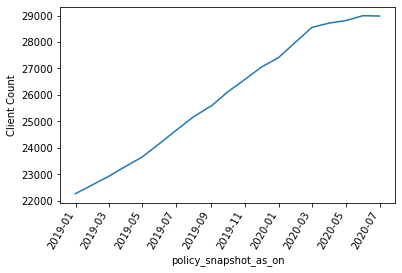

In [48]:
df.groupby('policy_snapshot_as_on').client_code.nunique().plot(rot=60)
plt.ylabel('Client Count')

### 2019-08-31 and 2019-09-01

In [49]:
hash(tuple(df[df.policy_snapshot_as_on=='2019-08-31'].sort_values('policy_code').policy_code.tolist()))

-1927975592725921319

In [50]:
hash(tuple(df[df.policy_snapshot_as_on=='2019-09-01'].sort_values('policy_code').policy_code.tolist()))

-1927975592725921319

In [78]:
different_count = 0
total = 0
for status1,status2,code1,code2 in zip(df[df.policy_snapshot_as_on=='2019-08-31'].sort_values('policy_code').policy_status.tolist(),df[df.policy_snapshot_as_on=='2019-09-01'].sort_values('policy_code').policy_status.tolist(),df[df.policy_snapshot_as_on=='2019-08-31'].sort_values('policy_code').policy_code.tolist(),df[df.policy_snapshot_as_on=='2019-09-01'].sort_values('policy_code').policy_code.tolist()):
    total += 1
    if status1 != status2:
        different_count += 1
        print(code1,code2,status1,status2)
print(total, different_count)

POL12657 POL12657 LAPSED INFORCE
POL12745 POL12745 LAPSED INFORCE
POL19656 POL19656 LAPSED INFORCE
POL23097 POL23097 LAPSED INFORCE
POL24813 POL24813 LAPSED INFORCE
POL25873 POL25873 LAPSED INFORCE
POL26955 POL26955 LAPSED INFORCE
POL29400 POL29400 LAPSED INFORCE
POL29543 POL29543 LAPSED INFORCE
POL32263 POL32263 TERMINATED LAPSED
POL34721 POL34721 INFORCE LAPSED
POL34901 POL34901 LAPSED INFORCE
POL6436 POL6436 LAPSED INFORCE
POL8403 POL8403 LAPSED INFORCE
POL8511 POL8511 TERMINATED INFORCE
POL9223 POL9223 INFORCE LAPSED
31056 16


### Terminated policies

In [53]:
df[df.policy_status == 'TERMINATED'].sort_values(['client_code', 'policy_snapshot_as_on'])

,main_holder_occupation_cd,policy_term,policy_payment_mode,policy_status,commencement_dt,next_due_dt,termination_dt,termination_reason,main_holder_gender,main_holder_dob,...,child5_gender,payment_method,main_holder_occupation,policy_snapshot_as_on,run_date,client_code,agent_code,product_code,product_name,policy_code
590599,249.0,10,M,TERMINATED,2018-12-27,2019-01-27,2018-12-27,FINANCIAL DIFFICULTY,M,1973-08-01,...,NaN,CASH,NaN,2019-01-31,2020-07-01,C100005,AG102702,RE001,RETIREMENT,POL12735
72425,249.0,10,M,TERMINATED,2018-12-27,2019-01-27,2018-12-27,FINANCIAL DIFFICULTY,M,1973-08-01,...,NaN,CASH,NaN,2019-02-28,2020-07-01,C100005,AG102702,RE001,RETIREMENT,POL12735
177294,249.0,10,M,TERMINATED,2018-12-27,2019-01-27,2018-12-27,FINANCIAL DIFFICULTY,M,1973-08-01,...,NaN,CASH,NaN,2019-03-31,2020-07-01,C100005,AG102702,RE001,RETIREMENT,POL12735
192647,249.0,10,M,TERMINATED,2018-12-27,2019-01-27,2018-12-27,FINANCIAL DIFFICULTY,M,1973-08-01,...,NaN,CASH,NaN,2019-04-30,2020-07-01,C100005,AG102702,RE001,RETIREMENT,POL12735
20581,249.0,10,M,TERMINATED,2018-12-27,2019-01-27,2018-12-27,FINANCIAL DIFFICULTY,M,1973-08-01,...,NaN,CASH,NaN,2019-05-31,2020-07-01,C100005,AG102702,RE001,RETIREMENT,POL12735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329042,249.0,20,M,TERMINATED,2011-10-21,2014-10-21,2020-05-26,SURRENDER,M,1965-01-01,...,NaN,CASH,NaN,2020-06-01,2020-07-01,C154411,AG107845,HE001,HEALTH,POL31912
460775,249.0,20,M,TERMINATED,2011-10-21,2014-10-21,2020-05-26,SURRENDER,M,1965-01-01,...,NaN,CASH,NaN,2020-07-01,2020-07-01,C154411,AG107845,HE001,HEALTH,POL31912
18563,163.0,15,M,TERMINATED,2012-01-07,2015-03-07,2020-05-12,SURRENDER,F,1983-04-01,...,NaN,CASH,BANK CLERK,2020-06-01,2020-07-01,C154412,AG107200,HE001,HEALTH,POL14717
478177,163.0,15,M,TERMINATED,2012-01-07,2015-03-07,2020-05-12,SURRENDER,F,1983-04-01,...,NaN,CASH,BANK CLERK,2020-07-01,2020-07-01,C154412,AG107200,HE001,HEALTH,POL14717


In [54]:
df[df.policy_status == 'TERMINATED'].sort_values(['client_code', 'policy_snapshot_as_on']).termination_reason.value_counts()

MATURITY TERMINATION     11032
SURRENDER                 9043
FINANCIAL DIFFICULTY      2078
DEATH                      188
AUTO SURRENDER              89
ERROR CANCELATION           79
CLAIM ON BASIC POLICY       60
EXPIRY TERMINATION          36
CUSTOMER REQUEST             2
LIVING ASSURANCE             2
Name: termination_reason, dtype: int64

### First snapshot

In [55]:
df_first = df[df.policy_snapshot_as_on=='2018-12-31'].copy()

In [75]:
prof = ProfileReport(df_first, minimal=True) 
prof.to_file(output_file='../output/pandas_profile__policy_first.html')

#### Next Due Date

In [56]:
df_first.next_due_dt.min()

Timestamp('1996-08-28 00:00:00')

In [59]:
df[df.next_due_dt==df.next_due_dt.min()]

,main_holder_occupation_cd,policy_term,policy_payment_mode,policy_status,commencement_dt,next_due_dt,termination_dt,termination_reason,main_holder_gender,main_holder_dob,...,child5_gender,payment_method,main_holder_occupation,policy_snapshot_as_on,run_date,client_code,agent_code,product_code,product_name,policy_code
61672,361.0,26,S,INFORCE,1996-08-28,1996-08-28,NaT,NaN,M,1968-07-01,...,NaN,CASH,FIRE FIGHTING OFFICE,2019-02-28,2020-07-01,C101670,AG102377,RE001,RETIREMENT,POL26193
64841,361.0,26,S,INFORCE,1996-08-28,1996-08-28,NaT,NaN,M,1968-07-01,...,NaN,CASH,FIRE FIGHTING OFFICE,2020-06-01,2020-07-01,C101670,AG102377,RE001,RETIREMENT,POL26193
83352,361.0,26,S,INFORCE,1996-08-28,1996-08-28,NaT,NaN,M,1968-07-01,...,NaN,CASH,FIRE FIGHTING OFFICE,2019-12-01,2020-07-01,C101670,AG102377,RE001,RETIREMENT,POL26193
169863,361.0,26,S,INFORCE,1996-08-28,1996-08-28,NaT,NaN,M,1968-07-01,...,NaN,CASH,FIRE FIGHTING OFFICE,2020-05-01,2020-07-01,C101670,AG102377,RE001,RETIREMENT,POL26193
238326,361.0,26,S,INFORCE,1996-08-28,1996-08-28,NaT,NaN,M,1968-07-01,...,NaN,CASH,FIRE FIGHTING OFFICE,2019-09-01,2020-07-01,C101670,AG102377,RE001,RETIREMENT,POL26193
240566,361.0,26,S,INFORCE,1996-08-28,1996-08-28,NaT,NaN,M,1968-07-01,...,NaN,CASH,FIRE FIGHTING OFFICE,2020-02-01,2020-07-01,C101670,AG102377,RE001,RETIREMENT,POL26193
255331,361.0,26,S,INFORCE,1996-08-28,1996-08-28,NaT,NaN,M,1968-07-01,...,NaN,CASH,FIRE FIGHTING OFFICE,2019-01-31,2020-07-01,C101670,AG102377,RE001,RETIREMENT,POL26193
257943,361.0,26,S,INFORCE,1996-08-28,1996-08-28,NaT,NaN,M,1968-07-01,...,NaN,CASH,FIRE FIGHTING OFFICE,2020-07-01,2020-07-01,C101670,AG102377,RE001,RETIREMENT,POL26193
319501,361.0,26,S,INFORCE,1996-08-28,1996-08-28,NaT,NaN,M,1968-07-01,...,NaN,CASH,FIRE FIGHTING OFFICE,2019-03-31,2020-07-01,C101670,AG102377,RE001,RETIREMENT,POL26193
359499,361.0,26,S,INFORCE,1996-08-28,1996-08-28,NaT,NaN,M,1968-07-01,...,NaN,CASH,FIRE FIGHTING OFFICE,2019-04-30,2020-07-01,C101670,AG102377,RE001,RETIREMENT,POL26193


#### Correlations

In [63]:
np.corrcoef(df_first.premium_value, df_first.total_sum_assuared)

array([[1.        , 0.67779849],
       [0.67779849, 1.        ]])

In [64]:
df.dtypes

main_holder_occupation_cd           float64
policy_term                           int64
policy_payment_mode                  object
policy_status                        object
commencement_dt              datetime64[ns]
next_due_dt                  datetime64[ns]
termination_dt               datetime64[ns]
termination_reason                   object
main_holder_gender                   object
main_holder_dob              datetime64[ns]
main_holder_entry_age                 int64
main_holder_smoker_flag              object
spouse_gender                        object
spouse_dob                   datetime64[ns]
spouse_entry_age                    float64
spouse_smoker_flag                   object
total_sum_assuared                  float64
premium_value                       float64
rider1_prem                           int64
rider1_sum_assuared                   int64
rider2_prem                         float64
rider2_sum_assuared                   int64
rider3_prem                     

In [69]:
categorical_variables = df.select_dtypes('object').columns.tolist()

#### Categorical variable value counts

In [83]:
for var in categorical_variables:
    print(df_first[var].value_counts(), end='\n\n')

M    19093
Y     3367
Q     2652
H     1249
S      255
Name: policy_payment_mode, dtype: int64

INFORCE       21798
LAPSED         4621
TERMINATED      197
Name: policy_status, dtype: int64

OTHERS                   2276
MATURITY TERMINATION      175
SURRENDER                 105
FINANCIAL DIFFICULTY       17
DEATH                       6
CLAIM ON BASIC POLICY       3
AUTO SURRENDER              1
Name: termination_reason, dtype: int64

M    17190
F     9426
Name: main_holder_gender, dtype: int64

N    24017
Y     2599
Name: main_holder_smoker_flag, dtype: int64

F    4905
M     503
Name: spouse_gender, dtype: int64

N    5279
Y     129
Name: spouse_smoker_flag, dtype: int64

M    2056
F    1945
Name: child1_gender, dtype: int64

M    1058
F     919
Name: child2_gender, dtype: int64

M    214
F    163
Name: child3_gender, dtype: int64

M    16
F    10
Name: child4_gender, dtype: int64

M    1
Name: child5_gender, dtype: int64

CASH      26130
CHEQUE      486
Name: payment_method, dtype

## Agent Data

In [84]:
df_ = pd.read_csv(AGENT_DATA, parse_dates=['dob', 'date_joined','termination_date'])

In [85]:
df_.columns

Index(['agent_level', 'title', 'dob', 'gender', 'marital_status',
       'date_joined', 'status', 'substatus', 'termination_date', 'city_name',
       'cluster_code', 'agent_code', 'supervisor_code', 'zone_code',
       'region_code', 'designation'],
      dtype='object')

In [92]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df_.head())

,agent_level,title,dob,gender,marital_status,date_joined,status,substatus,termination_date,city_name,cluster_code,agent_code,supervisor_code,zone_code,region_code,designation
0,L11,NaN,NaT,Female,NaN,NaT,INFORCED,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,National Manager
1,L2,Mr.,1957-12-01,Male,NaN,1999-05-24,INFORCED,ACTIVE,NaT,Ihala Beligalla,LA01001,AG102051,AG108546,ZONE103,RA267,Advisor
2,L2,Mr.,1973-09-01,Male,NaN,2008-05-27,TERMINATED,AUTOTERMINATED,2018-11-01,Alubomulla,LA01001,AG101552,AG102801,ZONE104,RA263,Advisor
3,L2,Mr.,1994-08-01,Male,NaN,2014-06-10,TERMINATED,AUTOTERMINATED,2019-07-19,Kekanadurra,LA01002,AG108852,AG106704,ZONE111,RA217,Advisor
4,L6,Mr.,1981-08-01,Male,NaN,2004-04-21,INFORCED,ACTIVE,NaT,Kolambageara,LA01002,AG106107,AG101697,ZONE105,RA220,Regional Manager


In [87]:
df_.dtypes

agent_level                 object
title                       object
dob                 datetime64[ns]
gender                      object
marital_status              object
date_joined         datetime64[ns]
status                      object
substatus                   object
termination_date    datetime64[ns]
city_name                   object
cluster_code                object
agent_code                  object
supervisor_code             object
zone_code                   object
region_code                 object
designation                 object
dtype: object

### Categoriacal variables

In [88]:
categorical_variables = df_.select_dtypes('object').columns.tolist()

In [90]:
for var in categorical_variables:
    print(df_[var].value_counts(), end='\n\n')

L2      8834
L1      4438
L3      1077
L7       178
L6       159
L11      113
L5       110
L8        32
L4        22
L9        13
L2_5       7
L6_5       6
L10        4
Name: agent_level, dtype: int64

Mr.      7204
Mrs.     2594
Ms.      2577
Miss.      96
Name: title, dtype: int64

Male      6761
Female    4908
Name: gender, dtype: int64

Single      2856
Married     2380
Divorced      13
Widow          5
Widower        1
Name: marital_status, dtype: int64

INFORCED      7869
TERMINATED    6682
SUSPENDED      442
Name: status, dtype: int64

ACTIVE                  7626
AUTOTERMINATED          2724
RESIGNED APPROVED       1700
RESIGNED UNAPPROVED     1369
TERMINATED BY SFA        888
SUSPENDED GENERAL        407
LEAVE UNAPPROVED          27
TO BE AUTOTERMINATED       2
LEAVE APPROVED             1
Name: substatus, dtype: int64

Colombo 03      4085
Colombo 05       383
Matara           249
Kurunegala       213
Kandy            198
                ... 
Kumbukgete         1
Jayasiripura

In [94]:
df_.agent_code.isna().sum()

5796

In [95]:
df.agent_code.isna().sum()

0